In [1]:
from sklearn.tree import DecisionTreeClassifier   #Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Loan.csv") # Importing Dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape  #Show data size- Rows and columns

(614, 13)

In [4]:
df.info() # Types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
df.describe() #Summary/ Descriptive stats only for cont. variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe(include=["object"]) #summary of catagorical variables

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002785,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df.describe(include=["int64"]) # summary of data type is int

,ApplicantIncome
count,614.000000
mean,5403.459283
std,6109.041673
min,150.000000
25%,2877.500000
50%,3812.500000
75%,5795.000000
max,81000.000000


In [8]:
df.isnull().sum() # Display null values in data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.Gender.mode() #Mode for catagorical variables

0    Male
dtype: object

In [10]:
df.Married.mode()

0    Yes
dtype: object

In [11]:
df.Education.mode()

0    Graduate
dtype: object

In [12]:
df.Self_Employed.mode()

0    No
dtype: object

In [13]:
df.mean() #Mean for continous variable

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [14]:
df['Gender'] = df['Gender'].fillna(('Male'))     #Catagorical data - Replace null value with mode 
df['Married'] = df['Married'].fillna(('Yes'))
df['Dependents'] = df['Dependents'].fillna(('0'))
df['Self_Employed'] = df['Self_Employed'].fillna(('No'))
df['Credit_History'] = df['Credit_History'].fillna(('1'))
df['LoanAmount'] = df['LoanAmount'].fillna((df['LoanAmount'].mean())) # Continous data - Replace null value with mean
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mean()))

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df["ApplicantIncome"] = df["ApplicantIncome"].astype('float64') #Change data type in float

In [17]:
del df['Loan_ID'] # Remove unique identity 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), object(8)
memory usage: 57.6+ KB


In [19]:
# Numrical columns store in new object
quantitative_columns = [col for col in df.columns.values if df[col].dtype == 'float64']
df_num = df[quantitative_columns]
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,146.412162,360.0
1,4583.0,1508.0,128.000000,360.0
2,3000.0,0.0,66.000000,360.0
3,2583.0,2358.0,120.000000,360.0
4,6000.0,0.0,141.000000,360.0


In [20]:
#Categorical variables store in new object
qualitative_cat = [col for col in df.columns.values if df[col].dtype == 'object']
df_obj = df[qualitative_cat]
df_obj.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


# One hot encoding

In [21]:
data_cat_dummies = pd.get_dummies(df_obj,  drop_first= True)
data_cat_dummies.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_1,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,1,0,0,1,1
1,1,1,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,1,1,0,0,1,1
3,1,1,0,0,0,1,0,1,0,0,1,1
4,1,0,0,0,0,0,0,1,0,0,1,1


In [22]:
newdata = pd.concat([df_num, data_cat_dummies], axis=1) # Concat the cont. and dummies data
newdata.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_1,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,146.412162,360.0,1,0,0,0,0,0,0,1,0,0,1,1
1,4583.0,1508.0,128.000000,360.0,1,1,1,0,0,0,0,1,0,0,0,0
2,3000.0,0.0,66.000000,360.0,1,1,0,0,0,0,1,1,0,0,1,1
3,2583.0,2358.0,120.000000,360.0,1,1,0,0,0,1,0,1,0,0,1,1
4,6000.0,0.0,141.000000,360.0,1,0,0,0,0,0,0,1,0,0,1,1


In [23]:
newdata.shape

(614, 16)

In [24]:
# Seperating the data into dependent and independent variable
X = newdata.iloc[:, :-1].values
Y = newdata.iloc[:, -1].values

# Splitting the dataset into the Training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 0)

# Logistic Regression

In [25]:
# Logistic Regrssion
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [27]:
# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.84      0.96      0.90        90

   micro avg       0.84      0.84      0.84       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.83      0.84      0.82       123

[[17 16]
 [ 4 86]]
accuracy is 0.8373983739837398


# Decision Tree

In [28]:
## Decision Tree
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                                   max_features=None, max_leaf_nodes=None,
                                   min_impurity_split=1e-07, min_samples_leaf=1,
                                   min_samples_split=2, random_state=None, splitter='best')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.47      0.70      0.56        33
           1       0.86      0.71      0.78        90

   micro avg       0.71      0.71      0.71       123
   macro avg       0.67      0.70      0.67       123
weighted avg       0.76      0.71      0.72       123

[[23 10]
 [26 64]]
accuracy is 0.7073170731707317


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53        33
           1       0.83      0.81      0.82        90

   micro avg       0.74      0.74      0.74       123
   macro avg       0.67      0.68      0.67       123
weighted avg       0.74      0.74      0.74       123

[[18 15]
 [17 73]]
accuracy is 0.7398373983739838


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# K Nearest Neighbour (KNN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [32]:
# Instantiate Learning Model (k=33)
classifier = KNeighborsClassifier(n_neighbors=33)

# Fitting the model
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [33]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 0, 33],
       [ 0, 90]], dtype=int64)

In [34]:
accuracy = accuracy_score(Y_test, Y_pred)* 100
print('Accuracy of our model is equal: ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal: 73.17%


In [35]:
error_rate = []

# K
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error rate')

<Figure size 432x288 with 0 Axes>

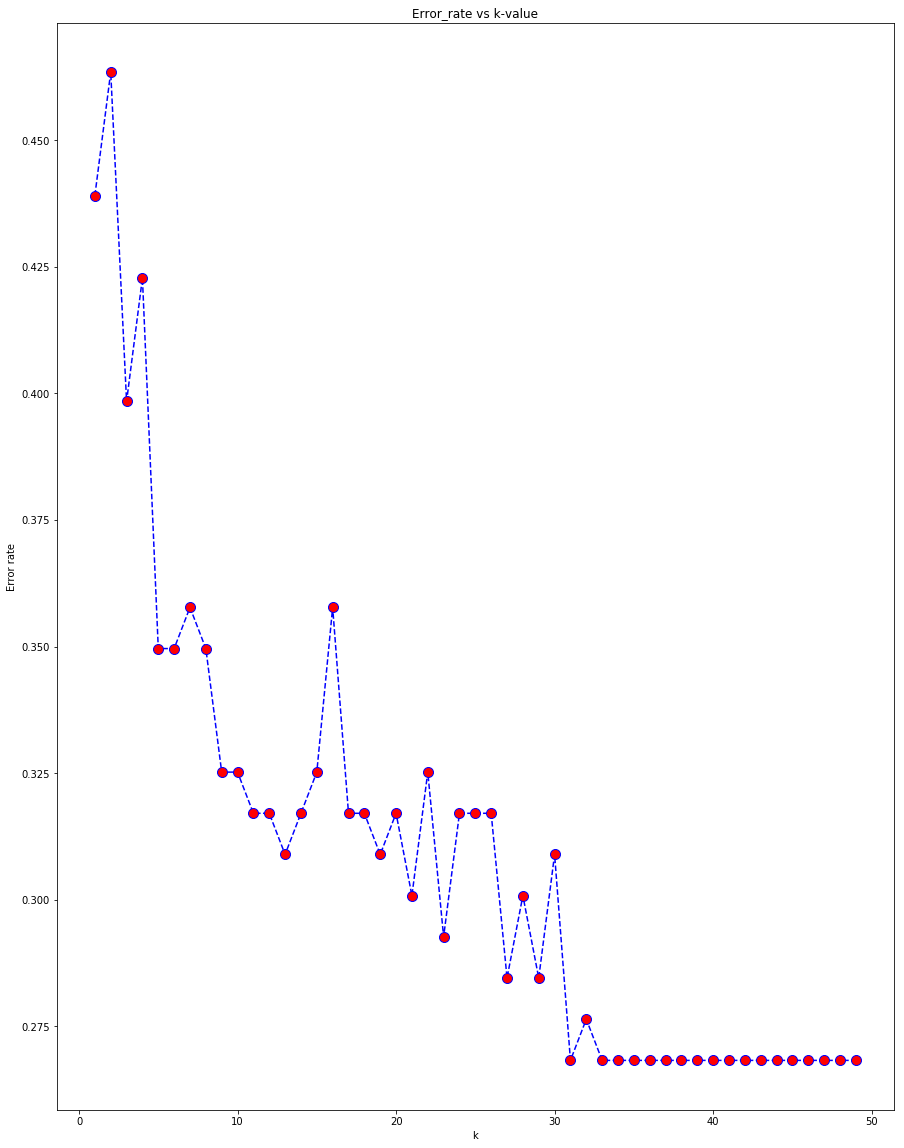

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(15,20))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.title('Error_rate vs k-value')
plt.xlabel('k')
plt.ylabel('Error rate')

# Ada Boosting

In [37]:
# Import Libraries
from sklearn.ensemble import AdaBoostClassifier

In [38]:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)* 100
print('Accuracy of our model is equal: ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal: 82.93%


In [39]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=50
)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)* 100
print('Accuracy of our model is equal: ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal: 82.93%


# SVM

In [40]:
from sklearn.svm import SVC

#Create a svm Classifier
classifier= SVC(kernel= 'rbf')

#Train the model using the training sets
classifier.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = classifier.predict(X_test)

# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

# Classification Report
print(classification_report(Y_test, Y_pred))

[[ 1 32]
 [ 0 90]]
accuracy is 0.7398373983739838
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        33
           1       0.74      1.00      0.85        90

   micro avg       0.74      0.74      0.74       123
   macro avg       0.87      0.52      0.45       123
weighted avg       0.81      0.74      0.64       123



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
